In [1]:
import math
import pandas as pd

#Load Data

In [24]:
df = pd.read_csv("data.csv")

In [25]:
x = df['Hours']
y = df['Score']
y

0      72.7
1     100.0
2      86.8
3      78.0
4      45.0
5      50.3
6      46.6
7     100.0
8      82.7
9      73.9
10     50.0
11     98.2
12     88.5
13     62.8
14     64.0
15     63.4
16     57.8
17     73.8
18     73.1
19     69.7
20     77.5
21     53.1
22     55.2
23     58.7
24     77.8
25    100.0
26     57.3
27     82.4
28     82.3
29     44.7
30     83.2
31     66.9
32     50.0
33    100.0
34     82.3
35     97.6
36     64.3
37     50.0
38     85.6
39     57.3
40     51.9
41     76.8
42     58.9
43     93.9
44     55.4
45     80.2
46     70.5
47     78.0
48     73.5
49     60.5
Name: Score, dtype: float64

In [26]:
x = list(x)
y = list(y)
x
y

[72.7,
 100.0,
 86.8,
 78.0,
 45.0,
 50.3,
 46.6,
 100.0,
 82.7,
 73.9,
 50.0,
 98.2,
 88.5,
 62.8,
 64.0,
 63.4,
 57.8,
 73.8,
 73.1,
 69.7,
 77.5,
 53.1,
 55.2,
 58.7,
 77.8,
 100.0,
 57.3,
 82.4,
 82.3,
 44.7,
 83.2,
 66.9,
 50.0,
 100.0,
 82.3,
 97.6,
 64.3,
 50.0,
 85.6,
 57.3,
 51.9,
 76.8,
 58.9,
 93.9,
 55.4,
 80.2,
 70.5,
 78.0,
 73.5,
 60.5]

In [22]:
import matplotlib.pyplot as plt

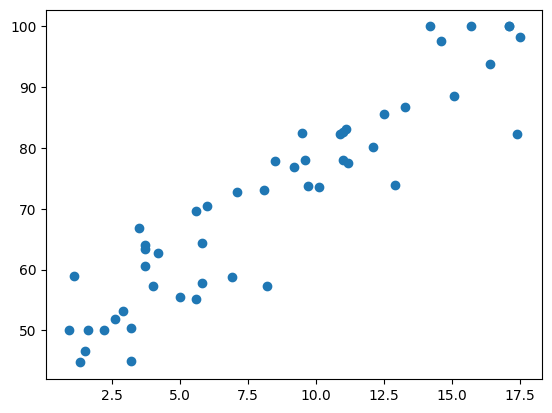

In [27]:
fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()

In [45]:
y_p = sum(y) / len(y)
y_p

71.262

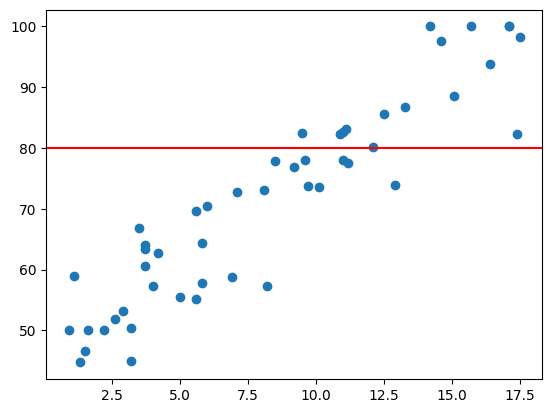

In [50]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.axhline(y=80, color='red', label='Static Prediction')
plt.show()

# Mean Squared Error

In [ ]:
E = 0
for y_i in y:
    e = pow(y_i - y_p,2)
    E += e

E = E / len(x)

In [28]:
def eqn(m,x,c):
    return (m*x)+c

In [29]:
def del_m(m,c):
    delm = 0
    for i in range(len(x)):
        e_m = x[i] * (y[i] - eqn(m,x[i],c))
        delm += e_m
    delm = -2 * delm / len(x)
    return delm

In [30]:
def del_c(m,c):
    delc = 0
    for i in range(len(x)):
        e_c = y[i] - eqn(m,x[i],c)
        delc += e_c
    delc = -2 * delc / len(x)
    return delc

In [49]:
def delta(m,c):
    delc = 0
    delm = 0
    for i in range(len(x)):
        e_c = y[i] - eqn(m,x[i],c)
        e_m = e_c * x[i]
        delm += e_m
        delc += e_c
    delm = -2 * delm / len(x)
    delc = -2 * delc / len(x)
    return delm, delc

In [76]:
epoch = 1000
l_r = 0.01
m = 0
c = 71.262
for i in range(epoch):
    del_m , del_c = delta(m,c)
    m -= l_r * del_m
    c -= l_r * del_c

In [77]:
print(m,c)

3.0002844060264224 46.386431895538


In [78]:
y_p = []
for i in range(len(x)):
    p = m*x[i] + c
    y_p.append(p)

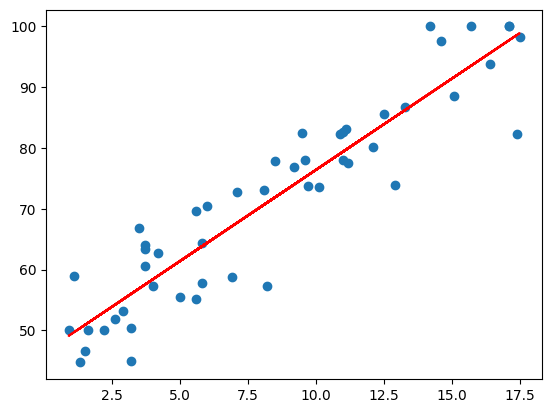

In [79]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_p, color='red', label='Static Prediction')
plt.show()